![](header.jpg)

# Dimensional Reduction

Kevin J. Walchko, Phd

23 Dec 2020

---

Dimensionality reduction, or dimension reduction, is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its intrinsic dimension. Working in high-dimensional spaces can be undesirable for many reasons; raw data are often sparse as a consequence of the curse of dimensionality, and analyzing the data is usually computationally intractable. Dimensionality reduction is common in fields that deal with large numbers of observations and/or large numbers of variables, such as signal processing, speech recognition, neuroinformatics, and bioinformatics.

Methods are commonly divided into linear and non-linear approaches. Approaches can also be divided into feature selection and feature extraction. Dimensionality reduction can be used for noise reduction, data visualization, cluster analysis, or as an intermediate step to facilitate other analyses.

Therefore, if we can reduce dimensionality, to what is really important, we can simplify our model and make training quick and easy. This idea of removing unnecessary dimensions follow Eigen value analysis of systems. The largest Eigen values are typically the most important in how a system responds to an input. Image compression also follows a similar process of only keeping the most important modes of an image.

Here we will take a dataset about wine which has 13 dimensions and reduce it down. Then we will apply a regressor on the transformed data and test its accuracy. Below is an example of the transformed state space.

<table>
  <tr>
    <th>Training Dataset</th>
    <th>Test Dataset</th>
  </tr>
  <tr>
    <td><img src="pca-pics/train.png"></td>
    <td><img src="pca-pics/test.png"></td>
  </tr>
</table>

| Method | Description |
|---|:---|
| PCA | performs linear mapping of data to a lower-dimensional space while maintaining the variance of the data |
| LDA | finds linear combinations of features that characterizes or separates two or more classes |
| Kernel PCA | employs a *kernel trick* to nonlinearly map data to a lower-dimensional space while maximizing variance |

The **goal** is to determine the *customer type* given the 13 parameters of each wine type and sell them wine to make **money**.

| Method     | Type      | Accuracy |
|:-----------|:----------|:--------:|
| PCA        | linear    | 94.4%    |
| LDA        | linear    | 97.2%    |
| Kernel PCA | nonlinear | 97.2%    |


## References

- Machine Learning class on udemy.com
- wikipedia: [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis)
- wikipedia: [dimensional reduction](https://en.wikipedia.org/wiki/Dimensionality_reduction)

In [9]:
import numpy as np
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import pandas as pd

from colorama import Fore

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [13]:
def evaluate(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print(f"{Fore.BLUE}Confusion Matrix:\n{Fore.RESET}{cm}")
    print("-------------------")
    print(f"{Fore.GREEN}True Associations (TA): {np.sum(np.diag(cm))}")
    print(f"{Fore.RED}False Associations (FA): {np.sum(cm) - np.sum(np.diag(cm))}{Fore.RESET}")
    print("-------------------")
    print(f"Accuracy: {100*accuracy_score(y_test, y_pred):0.1f}%")

In [4]:
# here is our wine dataset with both the 13 parameters and 
# customer type who buys it
dataset = pd.read_csv('Wine.csv')
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
dataset.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [18]:
# organize the data and split into train and test sets
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.2,  # reserve 20% of the data for testing
    random_state = 10) # set seed to zero so we always get same results

In [19]:
# scale the data so everything is in the same range
sc = StandardScaler()
x_train = sc.fit_transform(x_train) # ONLY fit the training data
x_test = sc.transform(x_test) # DO NOT fit the test data, will skew results

print(f"Original X dimensions: {x_train.shape}  Y dimension: {y_train.shape}")

Original X dimensions: (142, 13)  Y dimension: (142,)


# Principle Component Analysis (PCA)

Transformed X dimensions: (142, 2)  Y dimension: (142,)
Confusion Matrix:
[[10  0  0]
 [ 1 16  1]
 [ 0  0  8]]
-------------------
True Associations (TA): 34
False Associations (FA): 2
-------------------
Accuracy: 94.4%


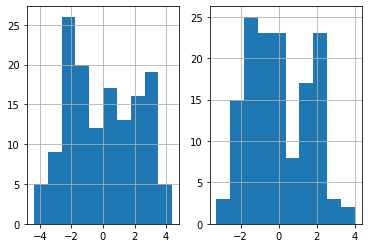

In [20]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components = 2)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)

print(f"Transformed X dimensions: {X_train.shape}  Y dimension: {y_train.shape}")

plt.subplot(1,2,1)
plt.hist(X_train[:,0])
plt.grid(True)
plt.subplot(1,2,2)
plt.hist(X_train[:,1])
plt.grid(True);

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

evaluate(y_test, y_pred)

# Linear Discrimant Analysis (LDA)

Transformed X dimensions: (142, 2)  Y dimension: (142,)
Confusion Matrix:
[[10  0  0]
 [ 0 17  1]
 [ 0  0  8]]
-------------------
True Associations (TA): 35
False Associations (FA): 1
-------------------
Accuracy: 97.2%


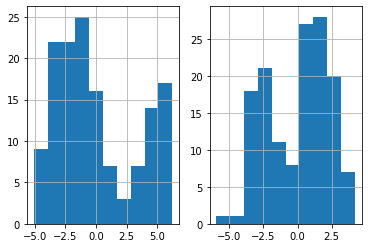

In [21]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(x_train, y_train) # train and scale, need both x/y for training
X_test = lda.transform(x_test) # only scaling here, this is new data

print(f"Transformed X dimensions: {X_train.shape}  Y dimension: {y_train.shape}")

plt.subplot(1,2,1)
plt.hist(X_train[:,0])
plt.grid(True)
plt.subplot(1,2,2)
plt.hist(X_train[:,1])
plt.grid(True);

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

evaluate(y_test, y_pred)

# Kernel PCA

Transformed X dimensions: (142, 2)  Y dimension: (142,)
Confusion Matrix:
[[10  0  0]
 [ 0 17  1]
 [ 0  0  8]]
-------------------
True Associations (TA): 35
False Associations (FA): 1
-------------------
Accuracy: 97.2%


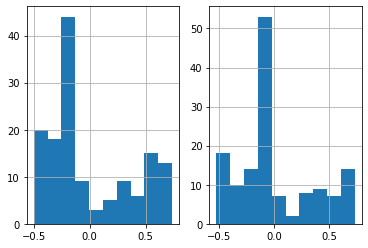

In [22]:
from sklearn.decomposition import KernelPCA
# use a radial basis function
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

print(f"Transformed X dimensions: {X_train.shape}  Y dimension: {y_train.shape}")

plt.subplot(1,2,1)
plt.hist(X_train[:,0])
plt.grid(True)
plt.subplot(1,2,2)
plt.hist(X_train[:,1])
plt.grid(True);

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

evaluate(y_test, y_pred)